### Import Necessary Library

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Read the data

In [30]:
df =pd.read_csv("height-weight.csv")
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


#### Data Preprocessing & EDA

In [31]:
df.shape

(23, 2)

In [32]:
df.columns

Index(['Weight', 'Height'], dtype='object')

In [33]:
df.dtypes

Weight    int64
Height    int64
dtype: object

In [34]:
df.isnull().sum()

Weight    0
Height    0
dtype: int64

In [35]:
df.duplicated().sum()

1

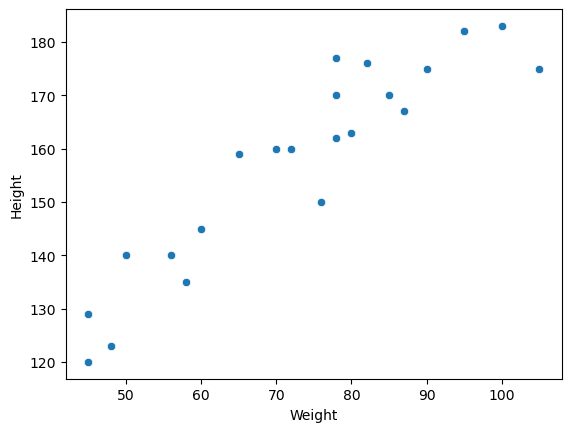

In [36]:
sns.scatterplot(x="Weight",y="Height",data=df)
plt.show()

#### Separate the X & Y Variable

In [37]:
X = df[["Weight"]] ## Independant feature
y = df["Height"] ### dependant Features

In [38]:
X

,Weight
0,45
1,58
2,48
3,60
4,70
5,78
6,80
7,90
8,95
9,78


In [39]:
y

0     120
1     135
2     123
3     145
4     160
5     162
6     163
7     175
8     182
9     170
10    176
11    182
12    175
13    183
14    170
15    177
16    140
17    159
18    150
19    167
20    129
21    140
22    160
Name: Height, dtype: int64

#### Train test Split

In [40]:
from sklearn.model_selection import train_test_split
X_train ,X_test ,y_train,y_test =train_test_split(X ,y,test_size=0.20,random_state= 1)

In [41]:
X_train

,Weight
16,50
10,82
4,70
2,48
18,76
6,80
7,90
1,58
14,85
0,45


In [42]:
y_train

16    140
10    176
4     160
2     123
18    150
6     163
7     175
1     135
14    170
0     120
15    177
22    160
21    140
9     170
8     182
12    175
11    182
5     162
Name: Height, dtype: int64

#### Scaling ifd required 

In [43]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
scaler

StandardScaler()

In [44]:
X_train =scaler.fit_transform(X_train)
X_test  =scaler.transform(X_test)

In [45]:
X_train

array([[-1.4611864 ],
       [ 0.44730196],
       [-0.26838118],
       [-1.58046693],
       [ 0.08946039],
       [ 0.32802144],
       [ 0.92442405],
       [-0.98406431],
       [ 0.62622274],
       [-1.75938771],
       [ 0.20874091],
       [-0.14910065],
       [-1.10334484],
       [ 0.20874091],
       [ 1.22262536],
       [ 1.81902797],
       [ 1.22262536],
       [ 0.20874091]])

In [46]:
X_test

array([[-1.75938771],
       [-0.56658248],
       [-0.86478379],
       [ 1.52082666],
       [ 0.74550327]])

#### Model Training

In [47]:
from sklearn.linear_model import LinearRegression
model =LinearRegression()
model

LinearRegression()

In [48]:
model.fit(X_train ,y_train)

LinearRegression()

In [49]:
model.coef_

array([17.73635106])

In [50]:
model.intercept_

158.88888888888889

In [51]:
y_pred =model.predict(X_test)
y_pred

array([127.68377082, 148.83978307, 143.55078001, 185.86280451,
       172.11139655])

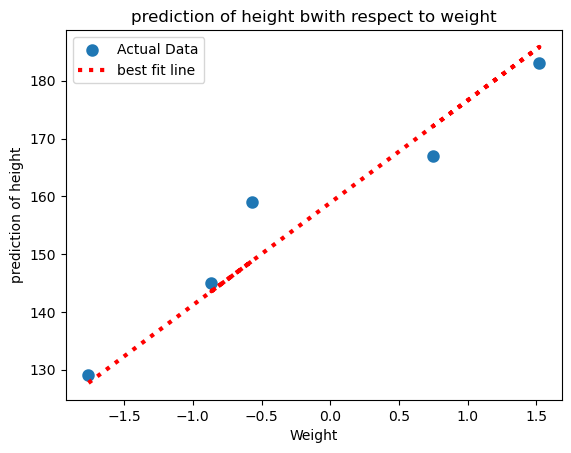

In [60]:
plt.scatter(X_test ,y_test, linewidth=3 ,label ="Actual Data")
plt.plot(X_test ,y_pred,color="r",linewidth=3 ,linestyle ="dotted",label="best fit line")
plt.xlabel("Weight")
plt.ylabel("prediction of height")
plt.title("prediction of height bwith respect to weight")
plt.legend()
plt.show()

#### Model Evaluation

In [62]:
from sklearn.metrics import mean_squared_error ,mean_absolute_error ,r2_score

MeanSquareError =mean_squared_error(y_test ,y_pred)
print("Mean Square error is :",MeanSquareError)

Mean Square error is : 28.276946048811972


In [63]:
MeanAbsoluteError =mean_absolute_error(y_test,y_pred)
print("Mean Absolute Error :",MeanAbsoluteError)

Mean Absolute Error : 4.179973432576932


In [67]:
R2_score =r2_score(y_test ,y_pred)
print("r2-score is :",R2_score)

r2-score is : 0.9171832648523548


In [68]:
RootMeanSquareError =np.sqrt(MeanSquareError)
print("RMSE :",RootMeanSquareError)

RMSE : 5.317607173232334


In [72]:
AdjustedRSquare =((1-r2_score(y_test ,y_pred))*(len(y_test)-1) / (len(y_test)- X_test.shape[1]-1))
print("Adjusted R square :",AdjustedRSquare)

Adjusted R square : 0.1104223135301936
